In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

### Fill the volume in missing time gaps as 0.0

In [155]:
data = pd.read_csv("data/training_20min_avg_volume.csv")
data["start_time"] = data["time_window"].apply(lambda x: datetime.strptime(x.lstrip("[").split(",")[0], "%Y-%m-%d %H:%M:%S"))
start_time_tmp = datetime(2016, 9, 19, 0, 0, 0)
start_time_list = []
for i in range(2088):
    start_time_list.append(start_time_tmp + timedelta(minutes=20*i))

tollgate = [1, 2, 3]
direction = [0, 1]
for i in tollgate:
    for j in direction:
        df_list = []
        for k in start_time_list:    
            if (i != 2 or j != 1) and data[data.start_time == k][data.tollgate_id == i][data.direction == j].empty:
                time_window_tmp = "[" + k.strftime("%Y-%m-%d %H:%M:%S") + "," + (k + timedelta(minutes=20)).strftime("%Y-%m-%d %H:%M:%S") + ")"
                df_list.append([i, time_window_tmp, j, 0, k])
        df = pd.DataFrame(df_list, columns=data.columns)
        data = data.append(df).reset_index(drop=True)
        

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [160]:
data["date"] = data["start_time"].apply(lambda x: datetime.date(x))
data["time"] = data["start_time"].apply(lambda x: datetime.time(x))
data["day_of_week"] = data["start_time"].apply(lambda x: x.isoweekday())
data["is_weekend"] = data["day_of_week"].apply(lambda x: 1 if x>=6 else 0)
data = data.sort(["date", "time"])
data.head()

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,tollgate_id,time_window,direction,volume,start_time,date,time,day_of_week,is_weekend
0,1.0,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",1.0,140.0,2016-09-19,2016-09-19,00:00:00,1,0
1,1.0,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0.0,13.0,2016-09-19,2016-09-19,00:00:00,1,0
2,3.0,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",1.0,181.0,2016-09-19,2016-09-19,00:00:00,1,0
3,3.0,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0.0,17.0,2016-09-19,2016-09-19,00:00:00,1,0
4,2.0,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0.0,2.0,2016-09-19,2016-09-19,00:00:00,1,0


In [161]:
data.day_of_week.value_counts()

1    1800
7    1440
6    1440
5    1440
4    1440
3    1440
2    1440
Name: day_of_week, dtype: int64

#### Volume Comparison between different tollgate_id and direction

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


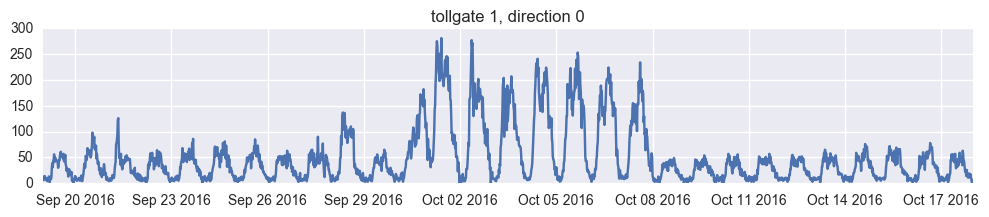

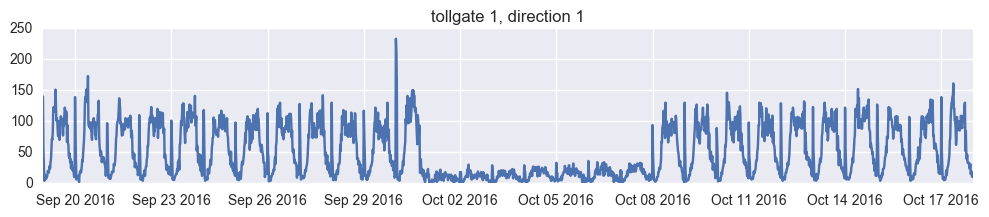

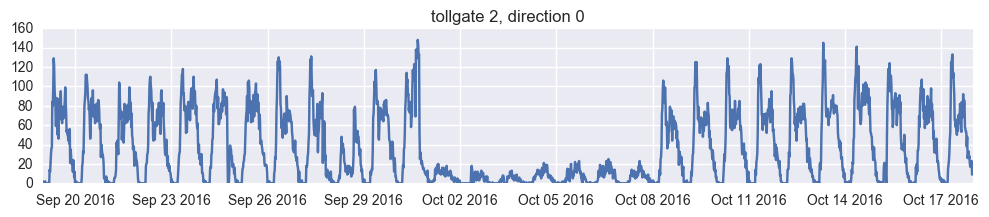

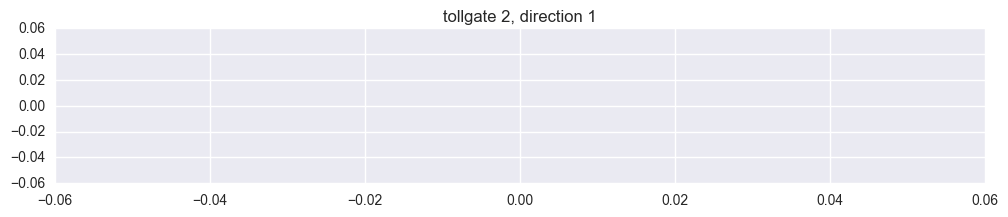

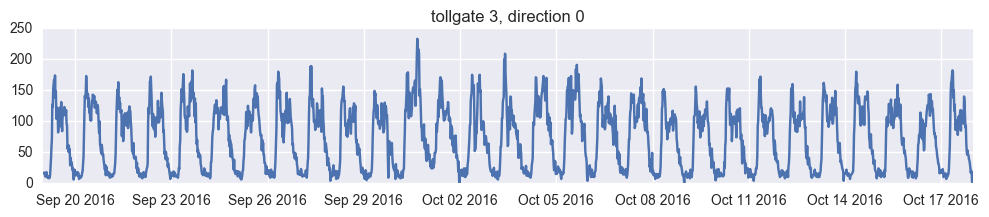

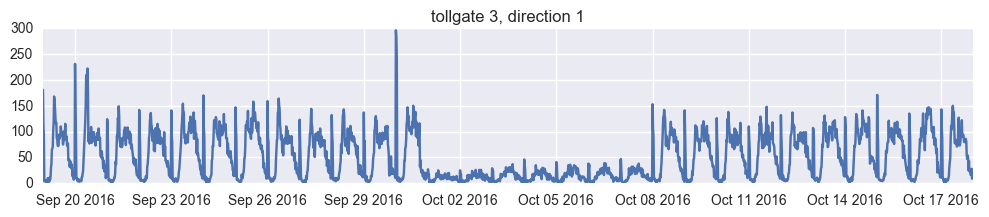

In [162]:
tollgate = [1, 2, 3]
direction = [0, 1]
for i in tollgate:
    for j in direction:
        data_ij = data[data.tollgate_id == i][data.direction == j]
        plt.figure(figsize=[12,2])
        plt.plot(data_ij.start_time, data_ij.volume)
        plt.title("tollgate " + str(i) +  ", direction " + str(j))

#### 非国庆节期间，两周的同一天流量差异很小；国庆节期间，两周的同一天流量差异巨大

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


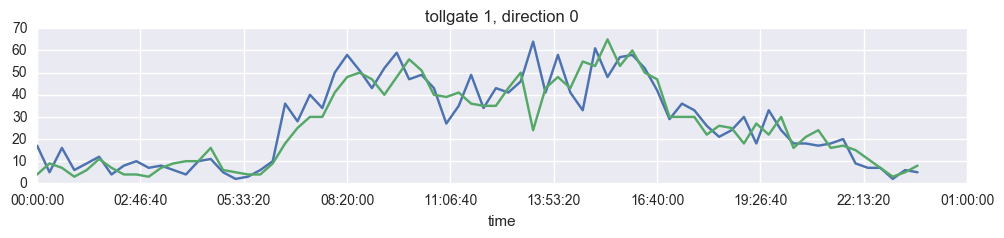

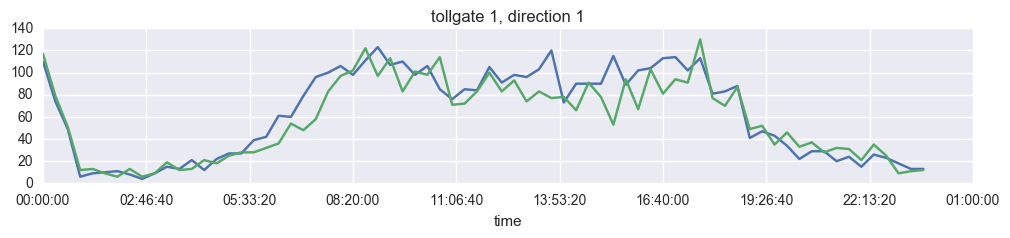

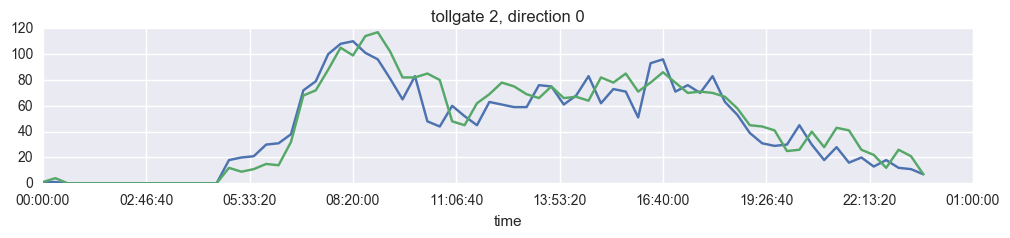

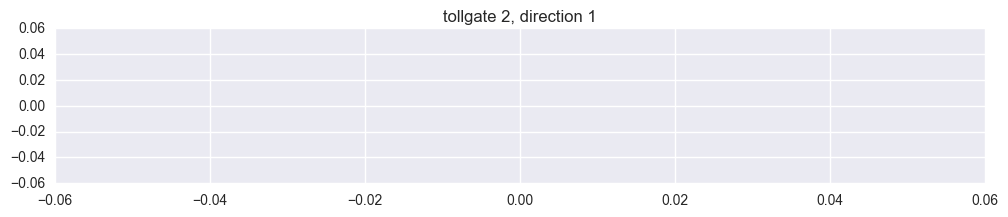

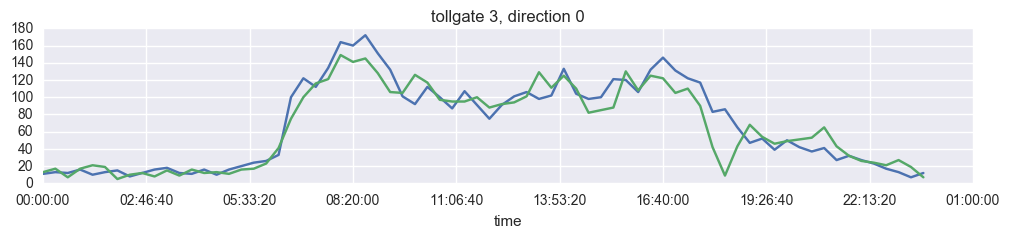

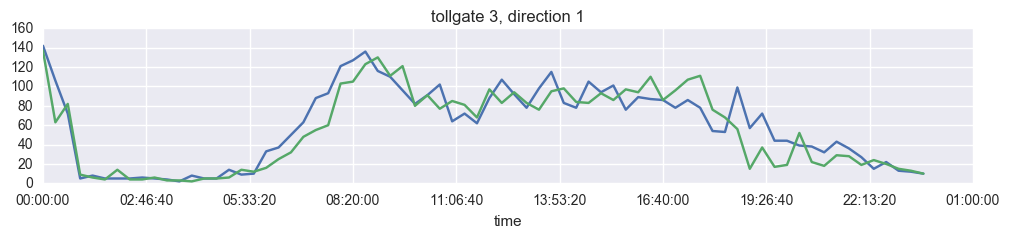

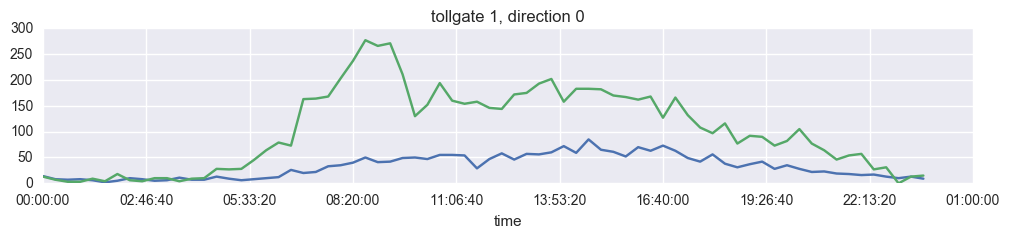

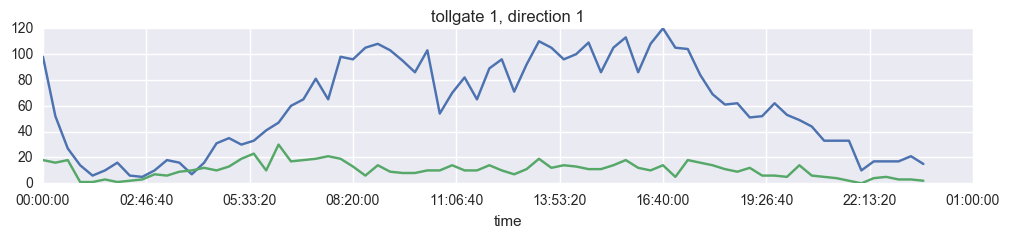

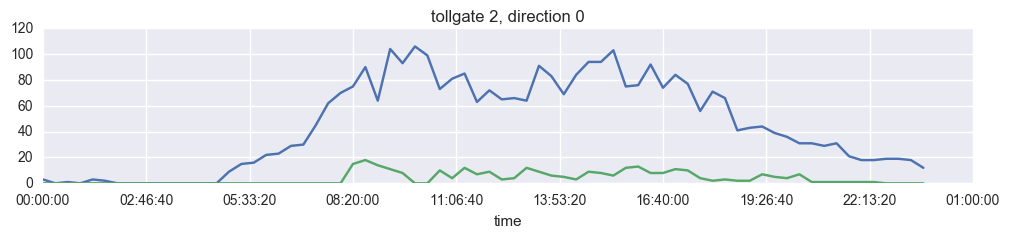

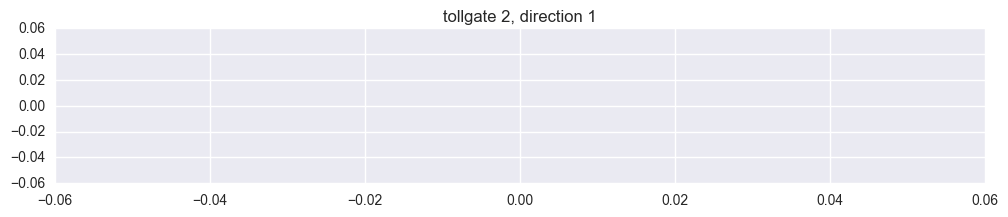

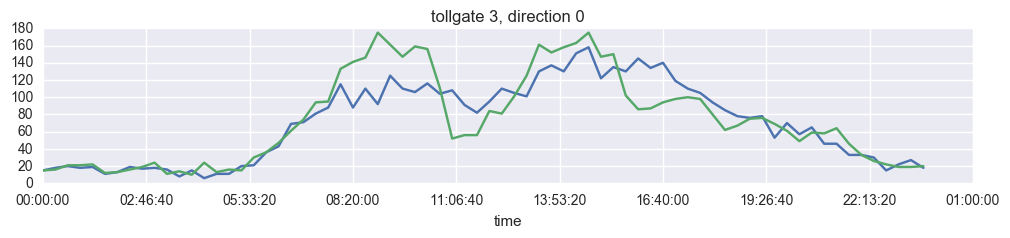

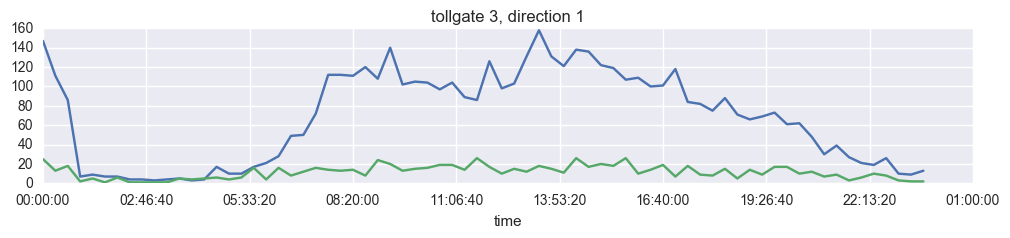

In [163]:
tollgate = [1, 2, 3]
direction = [0, 1]
target_1 = datetime.strptime('2016-09-22', '%Y-%m-%d').date()
target_2 = datetime.strptime('2016-09-29', '%Y-%m-%d').date()

for i in tollgate:
    for j in direction:
        plt.figure(figsize=[12,2])
        data_ij = data[data.tollgate_id == i][data.direction == j][data.date == target_1]
        plt.plot(data_ij.time, data_ij.volume)
        data_ij = data[data.tollgate_id == i][data.direction == j][data.date == target_2]
        plt.plot(data_ij.time, data_ij.volume)
        plt.title("tollgate " + str(i) +  ", direction " + str(j))
        
target_1 = datetime.strptime('2016-09-25', '%Y-%m-%d').date()
target_2 = datetime.strptime('2016-10-02', '%Y-%m-%d').date()

for i in tollgate:
    for j in direction:
        plt.figure(figsize=[12,2])
        data_ij = data[data.tollgate_id == i][data.direction == j][data.date == target_1]
        plt.plot(data_ij.time, data_ij.volume)
        data_ij = data[data.tollgate_id == i][data.direction == j][data.date == target_2]
        plt.plot(data_ij.time, data_ij.volume)
        plt.title("tollgate " + str(i) +  ", direction " + str(j))

#### drop掉国庆节期间数据

In [164]:
drop_date_start = datetime.strptime('2016-10-01', '%Y-%m-%d').date()
data_drop = data.copy()
for i in range(7):
    data_drop = data_drop[data_drop["date"] != drop_date_start + timedelta(hours = i*24)]

#### drop后的日平均流量

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


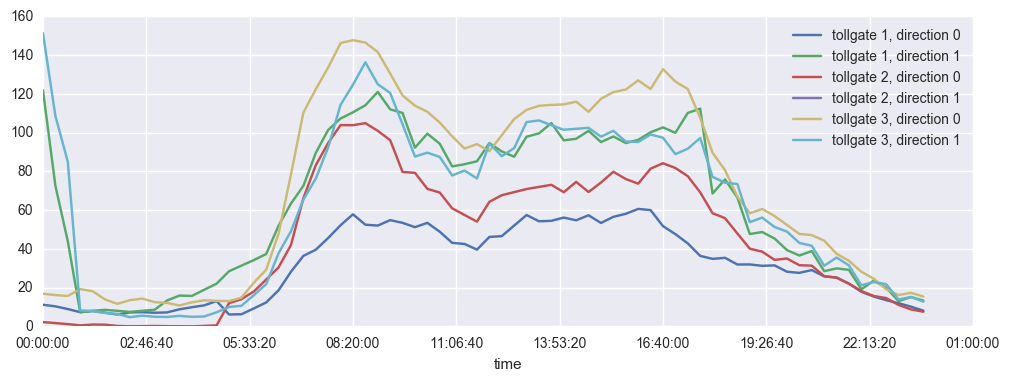

In [165]:
plt.figure(figsize=[12,4])
for i in tollgate:
    for j in direction:
        data_drop_ij = data_drop[data_drop.tollgate_id == i][data_drop.direction == j]
        data_drop_mean = data_drop_ij.groupby(["time"])["volume"].mean()
        plt.plot(data_drop_mean, label = "tollgate " + str(i) + ", direction " + str(j))
        plt.legend()

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


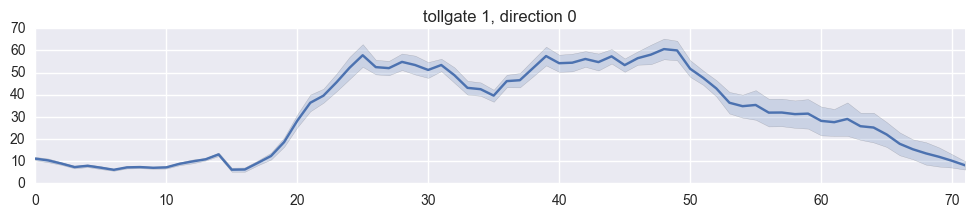

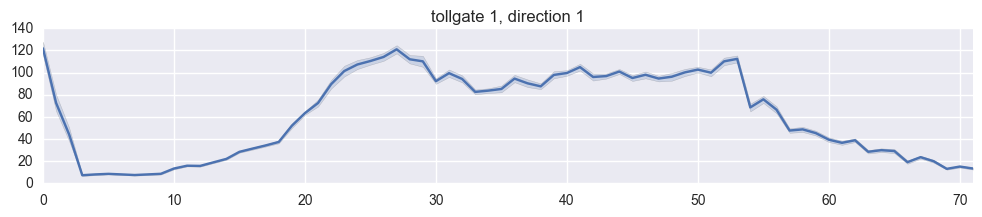

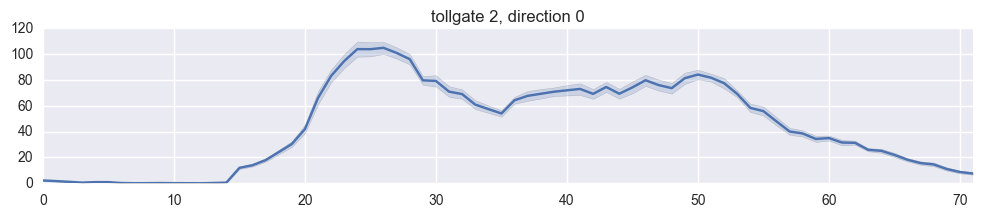

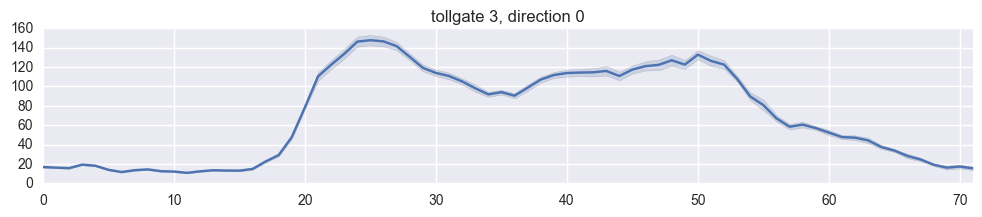

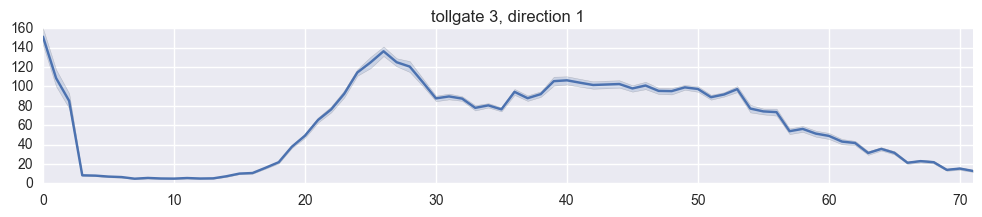

In [166]:
for i in tollgate:
    for j in direction:
        if (i != 2 or j != 1):
            data_drop_ij = data_drop[data_drop.tollgate_id == i][data_drop.direction == j]
            data_arr = np.array(data_drop_ij.sort(["date", "time"])["volume"]).reshape(-1, 72)
            plt.figure(figsize=[12,2])
            plt.title("tollgate " + str(i) + ", direction " + str(j))
            ax = sns.tsplot(data=data_arr)

### 五个时间序列相关性
(tollgate, direction) (3,1)和(1,1)相似度很高
单条(tollgate, direction)基本呈双峰分布

D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


          (1,0)     (1,1)     (2,0)     (3,0)     (3,1)
(1,0)  1.000000  0.588179  0.575057  0.751775  0.562169
(1,1)  0.588179  1.000000  0.808456  0.837067  0.909321
(2,0)  0.575057  0.808456  1.000000  0.905517  0.742803
(3,0)  0.751775  0.837067  0.905517  1.000000  0.772238
(3,1)  0.562169  0.909321  0.742803  0.772238  1.000000


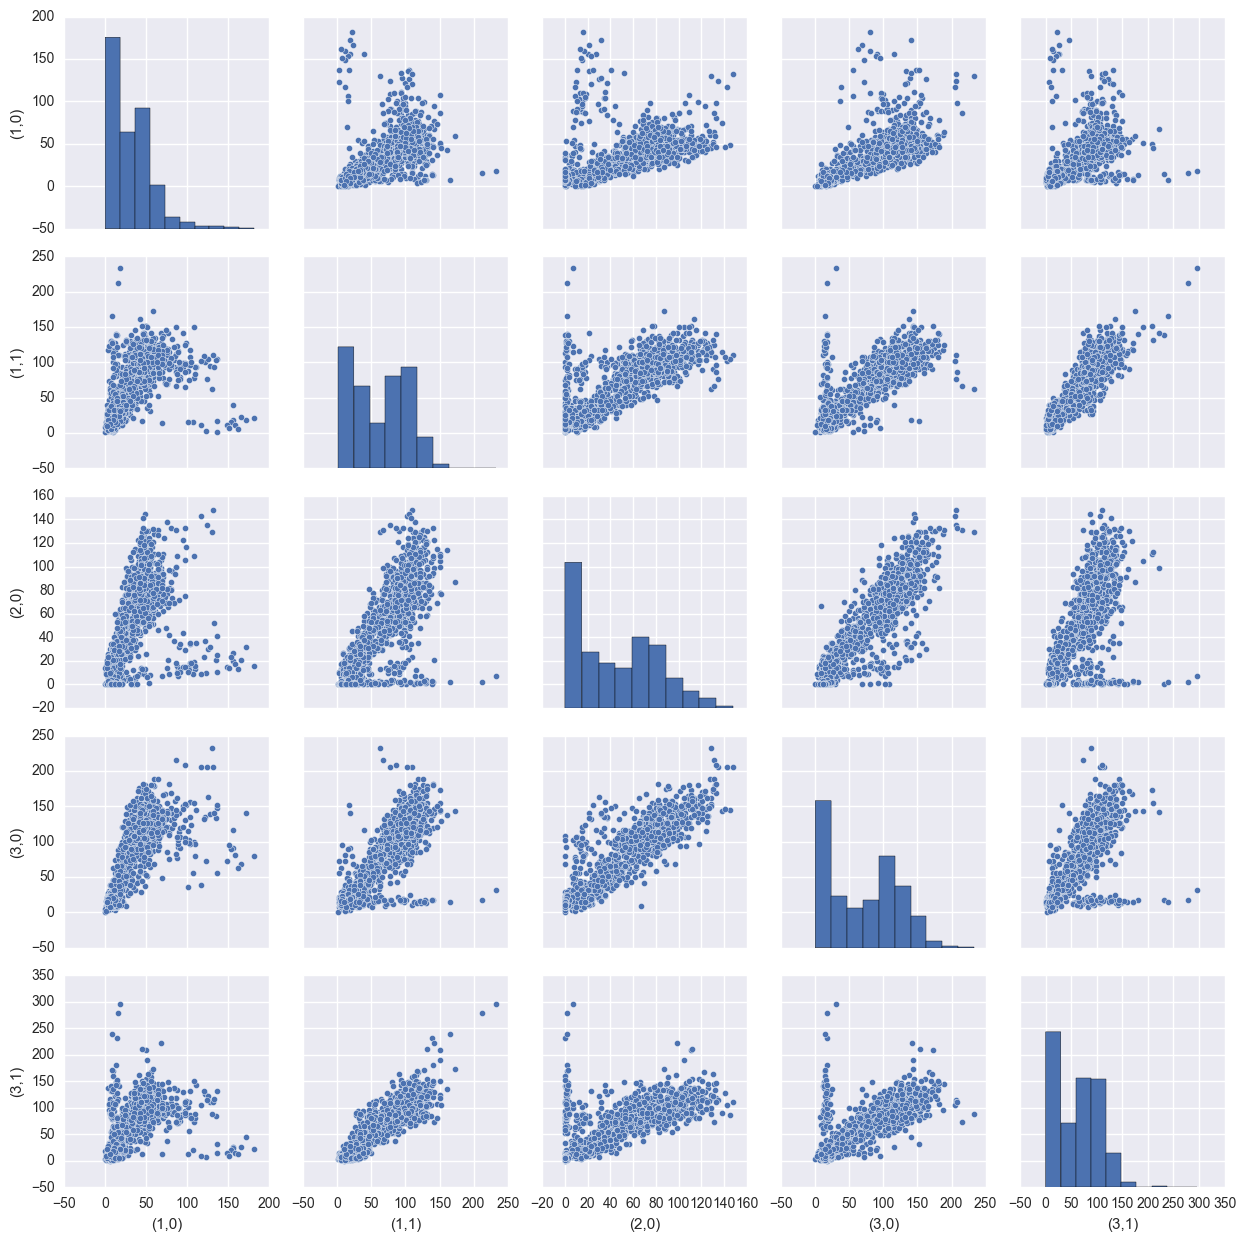

In [220]:
series_tmp = []
for i in tollgate:
    for j in direction:
        if (i != 2 or j != 1):
            data_drop_ij = data_drop[data_drop.tollgate_id == i][data_drop.direction == j]
            series_tmp.append(data_drop_ij.sort(["date", "time"])["volume"].tolist())
#series_tmp = np.log(series_tmp)
volume_df = pd.DataFrame(np.array(series_tmp).T, columns = ["(1,0)", "(1,1)", "(2,0)", "(3,0)", "(3,1)"])
print(volume_df.corr())
sns.pairplot(volume_df)

* tollgate 2只有一个direction，受国庆节影响
* tollgate 3的direction 0不受节日影响

全量数据也为双峰分布

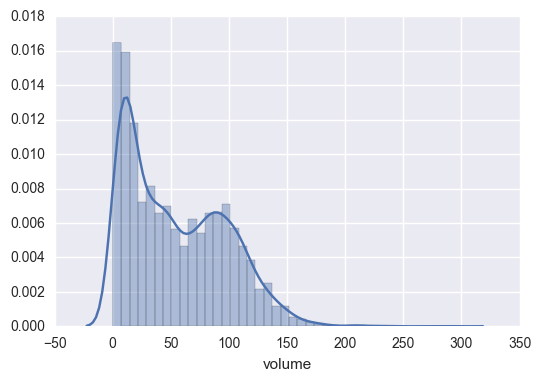

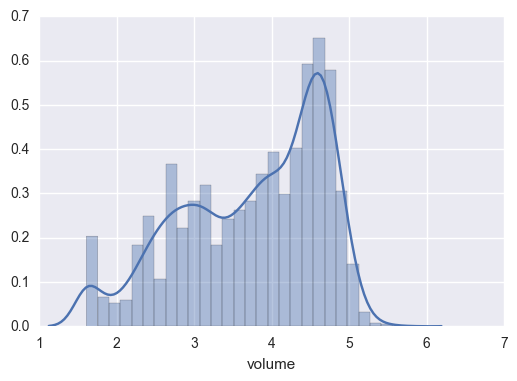

In [218]:
plt.figure()
sns.distplot(data_drop["volume"],norm_hist = True)
plt.figure()
sns.distplot(np.log(data_drop["volume"] +5))